In [3]:
import numpy as np
import pandas as pd
import datetime

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

plt.style.use('seaborn-darkgrid')
plt.rc('figure', figsize=(16,10))
plt.rc('lines', markersize=4)

import yfinance as yf

from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error


In [4]:
df = pd.read_csv('data/close_price_big_5.csv', index_col=['Date'], infer_datetime_format=True, parse_dates=['Date'])
df.head()

,AAPL,GOOGL,MSFT,AMZN,FB
Date,,,,,
2018-12-31,157.740005,1044.959961,101.570000,1501.969971,131.089996
2019-01-02,157.919998,1054.680054,101.120003,1539.130005,135.679993
2019-01-03,142.190002,1025.469971,97.400002,1500.280029,131.740005
2019-01-04,148.259995,1078.069946,101.930000,1575.390015,137.949997
2019-01-07,147.929993,1075.920044,102.059998,1629.510010,138.050003


# lấy giá chênh lệch

In [5]:
def get_diff(df, history=1):
    diff = []
    df = df.to_numpy()

    for i in range(history, len(df)):
        diff.append(df[i] - df[i-history])
        
    return np.array(diff)

In [6]:
def mean_relative_error(y_true, y_pred):
    return np.mean(np.abs((y_pred-y_true)/y_true))

In [7]:
cr = get_diff(df)
print(cr.shape)

(334, 5)


In [8]:
cr_aapl = get_diff(df['AAPL'])
print(type(cr_aapl))

<class 'numpy.ndarray'>


## Tạo bộ dữ liệu cho 1 công ty. X=Ngày hôm qua & giá chênh lệch giữa ngày hôm qua và hôm kia

In [9]:
def create_Xy(df, code):
    '''df has index as date
    columns are stock price of the companies
    '''
    history=2
    cr = get_diff(df[code])
    X1, X2, y, dates = [], [], [], []
    for row_idx in range(history, len(df)):
        X1.append( cr[row_idx-history:row_idx-1] )
        X2.append( df[code].iloc[row_idx-history+1:row_idx].values.reshape(-1) )
        
        y.append( df[code].iloc[row_idx].reshape(-1) )
        dates.append(df.index[row_idx])
    X1, X2, y = np.array(X1), np.array(X2), np.array(y)
    X = np.hstack((X1,X2))
    return X, y, dates

In [10]:
code = 'AAPL'
X,y,dates = create_Xy(df, code)

In [11]:
print(X.shape)
print(y.shape)

(333, 2)
(333, 1)


In [12]:
# use 7/10 of the dataset to train (use past price to predict future price)
n_train = len(y) * 7 // 10
X_train, y_train, dates_train, X_test, y_test, dates_test = X[:n_train], y[:n_train], dates[:n_train], X[n_train:], y[n_train:], dates[n_train:]

## Model

In [13]:
clf = LinearRegression()
clf.fit(X_train, y_train)
ypred = clf.predict(X_test)

## Plot result

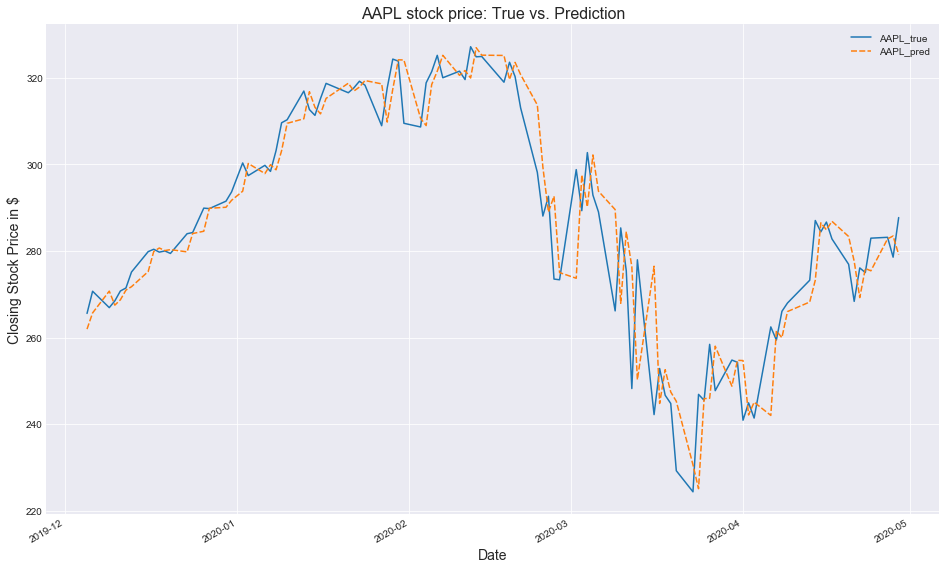

In [14]:
df_plot = pd.DataFrame({"AAPL_true": y_test.reshape(-1)[:], 'AAPL_pred': ypred.reshape(-1)[:]}, index=dates_test[:])

# Create subplots to plot graph and control axes
fig, ax = plt.subplots(figsize=(16,10))
sns.lineplot(data=df_plot)

# Format the ticks
loc = mdates.AutoDateLocator()
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(mdates.AutoDateFormatter(loc))

# Set figure title
plt.title(code + ' stock price: True vs. Prediction', fontsize=16)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('Closing Stock Price in $', fontsize=14)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.show()

In [15]:
print(code, mean_relative_error(y_test.reshape(-1), ypred.reshape(-1)))

AAPL 0.023509369589300454


In [16]:
cor, a = pearsonr(X[:,1],X[:,0])
print(cor)
print(a)

0.049903911322355415
0.36398265163005983


## Predict Google

In [18]:
code = 'GOOGL'
X,y,dates = create_Xy(df, code)

# use 7/10 of the dataset to train (use past price to predict future price)
n_train = len(y) * 7 // 10
X_train, y_train, dates_train, X_test, y_test, dates_test = X[:n_train], y[:n_train], dates[:n_train], X[n_train:], y[n_train:], dates[n_train:]

clf = LinearRegression()
clf.fit(X_train, y_train)
ypred = clf.predict(X_test)

print(code, mean_relative_error(y_test.reshape(-1), ypred.reshape(-1)))

GOOGL 0.021479513360569986


## Predict Microsoft

In [19]:
code = 'MSFT'
X,y,dates = create_Xy(df, code)

# use 7/10 of the dataset to train (use past price to predict future price)
n_train = len(y) * 7 // 10
X_train, y_train, dates_train, X_test, y_test, dates_test = X[:n_train], y[:n_train], dates[:n_train], X[n_train:], y[n_train:], dates[n_train:]

clf = LinearRegression()
clf.fit(X_train, y_train)
ypred = clf.predict(X_test)

print(code, mean_relative_error(y_test.reshape(-1), ypred.reshape(-1)))

MSFT 0.02274797521829697


## Predict Amazon

In [21]:
code = 'AMZN'
X,y,dates = create_Xy(df, code)

# use 7/10 of the dataset to train (use past price to predict future price)
n_train = len(y) * 7 // 10
X_train, y_train, dates_train, X_test, y_test, dates_test = X[:n_train], y[:n_train], dates[:n_train], X[n_train:], y[n_train:], dates[n_train:]

clf = LinearRegression()
clf.fit(X_train, y_train)
ypred = clf.predict(X_test)

def mean_relative_error(y_true, y_pred):
    return np.mean(np.abs((y_pred-y_true)/y_true))

print(code, mean_relative_error(y_test.reshape(-1), ypred.reshape(-1)))

AMZN 0.018751342892847463


## Predict Facebook

In [22]:
code = 'FB'
X,y,dates = create_Xy(df, code)

# use 7/10 of the dataset to train (use past price to predict future price)
n_train = len(y) * 7 // 10
X_train, y_train, dates_train, X_test, y_test, dates_test = X[:n_train], y[:n_train], dates[:n_train], X[n_train:], y[n_train:], dates[n_train:]

clf = LinearRegression()
clf.fit(X_train, y_train)
ypred = clf.predict(X_test)

print(code, mean_relative_error(y_test.reshape(-1), ypred.reshape(-1)))

FB 0.023463631548145115
